### Budget 2017

[![Logo][Budget2017]][BudgetURL]

1. It is the time of the year again in Feb, when the Government will announce the balance of projected revenues against expenditures for the upcoming Financial Year 2017.
2. One can get the Budget report from offical sources such as the budget [website][BudgetURL] or from the usual mainstream media outlets
3. Lets pull some data from last's year budget programmatically for our visualisation
4. Personally 2017 is a tough year for me as I'm juggling Financial and Family commitments in the face of employment uncertainity
5. Lets see what the Government will unveil come 20 Feb 2017 , will it be a surplus or deficit

[BudgetURL]: http://www.singaporebudget.gov.sg
[Budget2017]: https://4.bp.blogspot.com/-eKS7dGaZofs/VvffxrZhdYI/AAAAAAAAln8/kFVr5q-LdkE-eG8H9VKkpaN_voiuU1ZFQ/s400/Singapore-Budget-2016-where-the-money-going-ST-photo.jpg

In [1]:
%matplotlib inline

from urllib.request import Request, urlopen 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Trick webserver into giving us the xls rather than a 403
headers = { 'User-Agent' : 'Mozilla/5.0' }
budget2016url = 'http://www.singaporebudget.gov.sg/data/budget_2016/download/FY2016_Analysis_of_Revenue_and_Expenditure.xls'
filename = "FY2016_Analysis_of_Revenue_and_Expenditure.xls"

query = Request(budget2016url)
query.add_header('User-agent', 'Mozilla/5.0')
response = urlopen(query)

# Read Budget excel file into Pandas Dataframe
budget = pd.ExcelFile(response)


In [3]:
# Remove all the unnecessary rows
Subtotals=np.array([3,5,15,20,26])
Comments=np.arange(31,37,1)

# Load the xls file's T3.5 as a dataframe ,np.arange(31,36,1)
opex = budget.parse('T3.5',header=2,skiprows=np.concatenate((Subtotals,Comments),axis=0)).dropna()
# Show the cleaned table
opex

,FY2010,FY2011,FY2012,FY2013,FY2014,FY2015 (Revised),FY2016 (Budgeted)
Education,877,1042,860,973,886,700,660
National Development,1646,1572,1354,901,1308,1364,1246
Health,485,453,605,723,1147,1474,1798
Environment and Water Resources,406,349,352,325,427,567,704
"Culture, Community and Youth2",-,-,95,212,617,804,563
Social and Family Development2,120,64,37,41,62,115,100
Communications and Information2,109,123,79,61,148,162,117
Manpower (Financial Security),0,0,0,0,0,0,0
Defence,438,479,468,422,429,431,671
Home Affairs,240,194,207,379,438,465,575


In [4]:
opex.describe().round()

,FY2012,FY2013,FY2014,FY2015 (Revised),FY2016 (Budgeted)
count,19,19,19,19,19
mean,662,632,735,1036,1000
std,1295,1277,1277,2351,2021
min,0,0,0,0,0
25%,41,40,42,54,80
50%,163,212,427,319,379
75%,536,572,752,752,688
max,5414,5504,5489,10345,8760


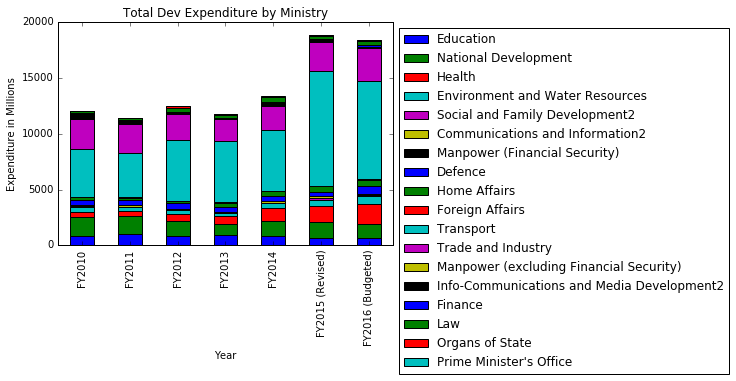

In [5]:
my_plot = opex.T.plot(kind='bar',stacked=True,title="Total Dev Expenditure by Ministry")
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Expenditure in Millions")
my_plot.legend(loc="best",bbox_to_anchor=(1, 1))

In [6]:
# Load the xls file's T3.8 as a dataframe ,np.arange(31,36,1) skiprows=[3,5,15,20,26,31,32,33,34,35,36])
Headcount = budget.parse('T3.8',header=2,skiprows=[27]).dropna()
# Show the cleaned table
Headcount

# Table of Headcounts

,FY20101,FY2011,FY2012,FY2013,FY2014,FY2015 (Revised)2,FY2016 (Budgeted)3
Civil List,53,56,51,52,52,65,65
Attorney-General's Chambers,355,417,478,534,550,582,585
Auditor-General's Office,159,159,172,169,171,190,198
Cabinet Office,11,10,10,10,11,10,12
Judicature,638,700,749,803,834,896,924
Parliament,45,46,47,48,47,62,62
Presidential Councils,4,4,4,4,3,6,6
Public Service Commission,13,13,13,13,13,14,15
Social and Family Development,4835,4757,1117,1571,1581,1806,1823
Defence,283,282,282,282,282,282,282


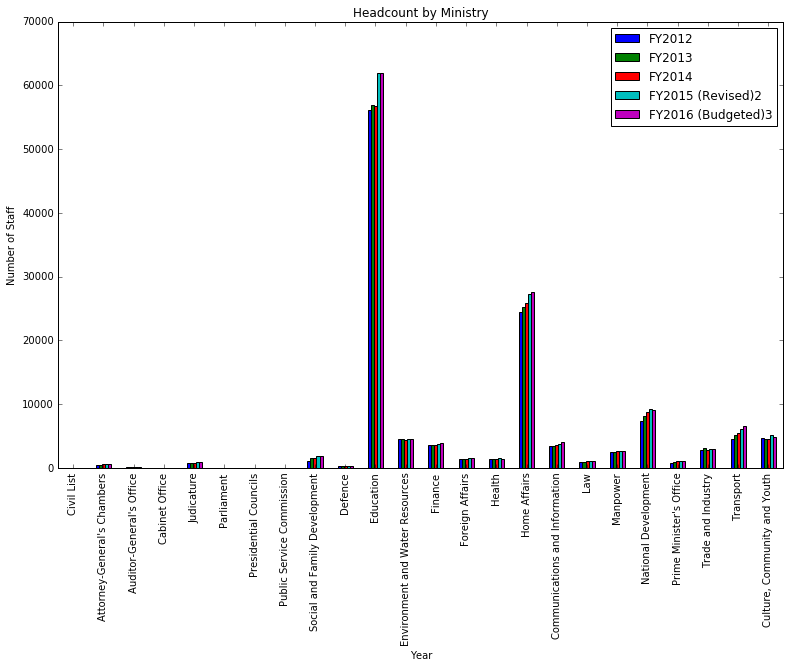

In [7]:
my_plot = Headcount.plot(kind='bar',stacked=False,title="Headcount by Ministry",figsize=[13,8])
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Number of Staff")
my_plot.legend(loc="best",bbox_to_anchor=(1, 1))

# Looking the Headcount as a bar chart

(-1.0060522676536559, 1.0005445245082294, -1.0061737813330616, 1.0)

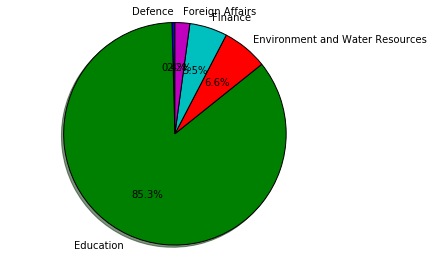

In [8]:
# The slices will be ordered and plotted counter-clockwise.
labels = list(Headcount['FY2014'].index)
sizes = list(Headcount['FY2014'])
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes[9:14], labels=labels[9:14],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

# Looking the Headcount as a pie chart for FY2014